<a href="https://colab.research.google.com/github/BrMrtn/GoogleColab/blob/main/K%C3%A9pfeldolgoz%C3%A1s/khf1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Könyvtárak importálása

In [18]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import numpy as np

Képek letöltése

In [14]:
!wget https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/resources/nature.jpg
!wget https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/resources/iceberg.png
!wget https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/resources/netflix.png

--2024-10-14 13:58:35--  https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/resources/nature.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19266 (19K) [image/jpeg]
Saving to: ‘nature.jpg.1’

nature.jpg.1        100%[===================>]  18.81K  --.-KB/s    in 0.001s  

2024-10-14 13:58:36 (18.1 MB/s) - ‘nature.jpg.1’ saved [19266/19266]

--2024-10-14 13:58:36--  https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/resources/iceberg.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53226 (52K) [image/png]
Savi

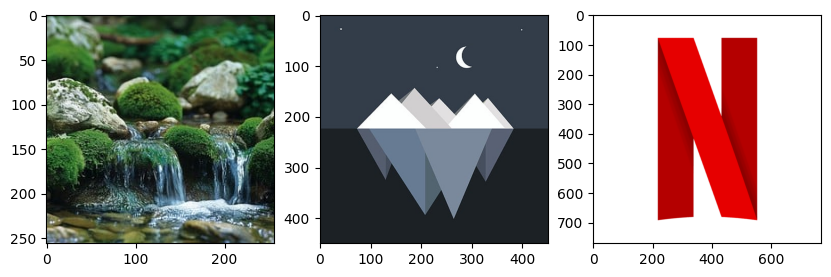

In [27]:
# képek beolvasása
img1 = cv2.imread("nature.jpg")
img2 = cv2.imread("iceberg.png")
img3 = cv2.imread("netflix.png")

# BGR-ből RGB-be konvertálás
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

# tömb, hogy együtt kezelhessük a képeket
images = [img1, img2, img3]

# képek megjelenítése
fig, axs = plt.subplots(1, 3, figsize=(10, 10))
for i, img in enumerate(images):
    axs[i].imshow(img)

Képek szín-bitmélységének megváltoztatása

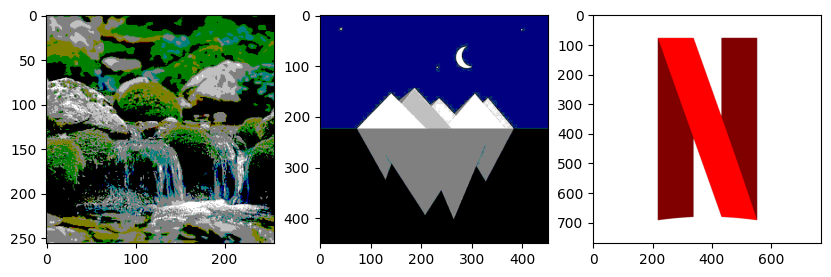

In [55]:
# # Képek kvantálása
# def quantize_image(image):
#     div = 102 # hány részre osztjuk minden csatornán a 256-ot
#     quantized_image = image // div * div + div // 2 # // a maradék nélküli osztás, vagyis csak a 16-tal osztható értékek maradnak a képben
#     return quantized_image

# img1_q = quantize_image(img1)
# img2_q = quantize_image(img2)
# img3_q = quantize_image(img3)

from sklearn.metrics import pairwise_distances_argmin

def closest_color(pixels, colors):
  new_pixels = []
  for pixel in pixels:
    min_distance = float('inf')
    closest_color = None
    for color in colors:
      distance = np.sqrt(((pixel[0]-color[0])*0.299) ** 2 + ((pixel[1]-color[1])*0.587) ** 2 + ((pixel[2]-color[2])*0.114) ** 2)
      # distance = np.linalg.norm(pixel - color)
      if distance < min_distance:
        min_distance = distance
        closest_color = color
    if closest_color is None:
      closest_color = [0, 0, 0]
    new_pixels.append(closest_color)
  return np.array(new_pixels)


# 16 szín meghatározása (www sztenderd alapján)
colors = np.array([
    [0, 255, 255],  # Aqua
    [0, 0, 0],      # Black
    [0, 0, 255],    # Blue
    [255, 0, 255],  # Fuchsia
    [128, 128, 128],# Gray
    [0, 128, 0],    # Green
    [0, 255, 0],    # Lime
    [128, 0, 0],    # Maroon
    [0, 0, 128],    # Navy
    [128, 128, 0],  # Olive
    [128, 0, 128],  # Purple
    [255, 0, 0],    # Red
    [192, 192, 192],# Silver
    [0, 128, 128],  # Teal
    [255, 255, 255],# White
    [255, 255, 0]   # Yellow
])

quantized_images = []

for img in images:
  pixels = img.reshape(-1, 3) # kép átalakítása 1 dimenziós rgb tömbbé
  new_pixels = closest_color(pixels, colors) # legközelebbi szín megtalálása
  new_image = new_pixels.reshape(img.shape) # kép visszaalakítása eredetire
  quantized_images.append(new_image)

# képek megjelenítése
fig, axs = plt.subplots(1, 3, figsize=(10, 10))
for i, img in enumerate(quantized_images):
    axs[i].imshow(img)

A bal, majd a középső képen a legészrevehetőbb a színtér méretének csökkentése. Ennek oka, hogy sok "egymáshoz közeli" szín szerepel rajtuk (egy színnek sok árnyalata).

Képek méretének csökkentése

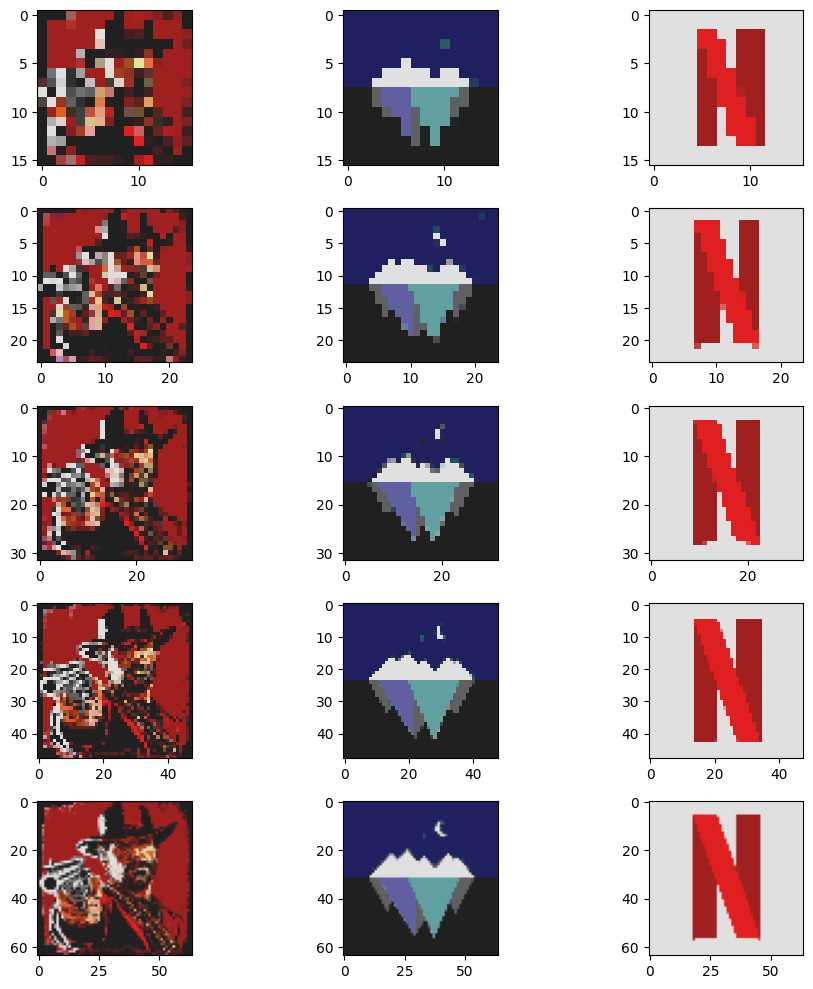

In [ ]:
icon1_16 = cv2.resize(img1_q, (16, 16))
icon2_16 = cv2.resize(img2_q, (16, 16))
icon3_16 = cv2.resize(img3_q, (16, 16))

icon1_24 = cv2.resize(img1_q, (24, 24))
icon2_24 = cv2.resize(img2_q, (24, 24))
icon3_24 = cv2.resize(img3_q, (24, 24))

icon1_32 = cv2.resize(img1_q, (32, 32))
icon2_32 = cv2.resize(img2_q, (32, 32))
icon3_32 = cv2.resize(img3_q, (32, 32))

icon1_48 = cv2.resize(img1_q, (48, 48))
icon2_48 = cv2.resize(img2_q, (48, 48))
icon3_48 = cv2.resize(img3_q, (48, 48))

icon1_64 = cv2.resize(img1_q, (64, 64))
icon2_64 = cv2.resize(img2_q, (64, 64))
icon3_64 = cv2.resize(img3_q, (64, 64))

fig, axs = plt.subplots(5, 3, figsize=(10, 10))
axs[0, 0].imshow(icon1_16)
axs[0, 1].imshow(icon2_16)
axs[0, 2].imshow(icon3_16)

axs[1, 0].imshow(icon1_24)
axs[1, 1].imshow(icon2_24)
axs[1, 2].imshow(icon3_24)

axs[2, 0].imshow(icon1_32)
axs[2, 1].imshow(icon2_32)
axs[2, 2].imshow(icon3_32)

axs[3, 0].imshow(icon1_48)
axs[3, 1].imshow(icon2_48)
axs[3, 2].imshow(icon3_48)

axs[4, 0].imshow(icon1_64)
axs[4, 1].imshow(icon2_64)
axs[4, 2].imshow(icon3_64)

plt.tight_layout()

Az eredményen látszik, hogy a kevesebb részlettel rendelkező, egyszerűbb alakzatokból összeálló képekből jobb ikonok lesznek.